## Predictive Maintenance Classification 

## Loading The Data

In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv("E:\AI Data Files\predictive_maintenance.csv")
df.sample(10)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
4701,4702,H34115,H,303.5,311.7,1584,32.7,143,0,No Failure
6608,6609,M21468,M,301.5,310.4,1593,36.8,50,0,No Failure
1495,1496,H30909,H,297.9,308.5,1383,44.6,184,0,No Failure
3604,3605,L50784,L,301.8,310.8,1557,33.3,190,0,No Failure
1057,1058,L48237,L,296.8,307.8,1573,36.4,126,0,No Failure
4731,4732,L51911,L,303.3,311.6,1301,45.1,219,1,Heat Dissipation Failure
2446,2447,L49626,L,299.3,308.6,1422,48.9,83,0,No Failure
4517,4518,L51697,L,302.4,310.3,1520,31.6,121,0,No Failure
1786,1787,L48966,L,298.4,308.2,1618,33.0,61,0,No Failure
4219,4220,L51399,L,301.9,310.7,1717,26.8,27,0,No Failure


## Preprocessing The Data

In [2]:
df["Failure Type"].value_counts()

No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: Failure Type, dtype: int64

In [3]:
df["Target"].value_counts()

0    9661
1     339
Name: Target, dtype: int64

In [4]:
pd.isna(df).sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

In [5]:
df.drop(["UDI","Product ID"],axis=1,inplace=True)
df

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,M,298.1,308.6,1551,42.8,0,0,No Failure
1,L,298.2,308.7,1408,46.3,3,0,No Failure
2,L,298.1,308.5,1498,49.4,5,0,No Failure
3,L,298.2,308.6,1433,39.5,7,0,No Failure
4,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...
9995,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,H,299.0,308.7,1408,48.5,25,0,No Failure


## How to Call a String inside a column

In [6]:
df2= df.loc[df['Failure Type'].str.contains("No Failure", case=False)]
df2


,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,M,298.1,308.6,1551,42.8,0,0,No Failure
1,L,298.2,308.7,1408,46.3,3,0,No Failure
2,L,298.1,308.5,1498,49.4,5,0,No Failure
3,L,298.2,308.6,1433,39.5,7,0,No Failure
4,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...
9995,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,H,299.0,308.7,1408,48.5,25,0,No Failure


## Select Multiple Rows based on Values and then droped it 

In [7]:
# Create a boolean mask indicating which rows to drop
mask = (df['Target'] == 1) & (df['Failure Type'] == "No Failure")

# Use the .drop() method to drop the rows
df = df.drop(df[mask].index, axis=0)
df

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,M,298.1,308.6,1551,42.8,0,0,No Failure
1,L,298.2,308.7,1408,46.3,3,0,No Failure
2,L,298.1,308.5,1498,49.4,5,0,No Failure
3,L,298.2,308.6,1433,39.5,7,0,No Failure
4,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...
9995,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,H,299.0,308.7,1408,48.5,25,0,No Failure


In [8]:
df["Target"].value_counts()

0    9661
1     330
Name: Target, dtype: int64

In [9]:
df["Failure Type"].value_counts()

No Failure                  9643
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: Failure Type, dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9991 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Type                     9991 non-null   object 
 1   Air temperature [K]      9991 non-null   float64
 2   Process temperature [K]  9991 non-null   float64
 3   Rotational speed [rpm]   9991 non-null   int64  
 4   Torque [Nm]              9991 non-null   float64
 5   Tool wear [min]          9991 non-null   int64  
 6   Target                   9991 non-null   int64  
 7   Failure Type             9991 non-null   object 
dtypes: float64(3), int64(3), object(2)
memory usage: 702.5+ KB


## Construct Histograms To Understand Data

In [11]:
import matplotlib.pyplot as plt
#df.hist(figsize=(30,25))

In [12]:
df["Tool wear [min]"].value_counts()

0      120
2       69
5       63
7       58
59      58
      ... 
237      1
239      1
241      1
251      1
253      1
Name: Tool wear [min], Length: 246, dtype: int64

## Categorical Encoding

In [13]:
#One Hot Encoding For Failure Type
one_hot_df=pd.get_dummies(df,prefix="Failure Type",columns=["Failure Type"],drop_first=False)
one_hot_df
df=one_hot_df
df.shape
#Now Label Encoding for Type
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df["Type"]=le.fit_transform(df[["Type"]])
df=pd.DataFrame(df)
print(le.classes_)

['H' 'L' 'M']


E:\Anaconda folder\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [14]:
df
df=df.drop("Failure Type_Heat Dissipation Failure",axis="columns")
df=df.drop("Failure Type_No Failure",axis="columns")
df=df.drop("Failure Type_Overstrain Failure",axis="columns")
df=df.drop("Failure Type_Power Failure",axis="columns")
df=df.drop("Failure Type_Random Failures",axis="columns")
df=df.drop("Failure Type_Tool Wear Failure",axis="columns")
df

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
0,2,298.1,308.6,1551,42.8,0,0
1,1,298.2,308.7,1408,46.3,3,0
2,1,298.1,308.5,1498,49.4,5,0
3,1,298.2,308.6,1433,39.5,7,0
4,1,298.2,308.7,1408,40.0,9,0
...,...,...,...,...,...,...,...
9995,2,298.8,308.4,1604,29.5,14,0
9996,0,298.9,308.4,1632,31.8,17,0
9997,2,299.0,308.6,1645,33.4,22,0
9998,0,299.0,308.7,1408,48.5,25,0


## Train - Test Spilit

In [15]:
from sklearn.model_selection import train_test_split
train_set ,test_set =train_test_split(df,test_size=0.2,random_state=42)
print(f"Length of train set  {len(train_set)}")
print(f"Length of train set  {len(test_set)}")
df["Type"].value_counts()

Length of train set  7992
Length of train set  1999


1    5996
2    2993
0    1002
Name: Type, dtype: int64

In [16]:
df=train_set
df

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
168,1,298.4,308.3,1433,62.3,20,1
4604,1,302.9,311.0,1820,24.6,128,0
8447,1,298.6,310.1,1439,49.9,17,0
9529,1,299.1,310.3,1459,46.7,84,0
4917,2,303.4,312.2,1561,38.2,45,0
...,...,...,...,...,...,...,...
5739,2,302.2,311.7,1653,31.4,2,0
5195,1,303.9,313.0,1551,36.8,140,0
5394,2,302.8,312.3,1262,70.5,234,1
860,0,296.1,306.9,1541,32.6,33,0


 ## Looking For Corelations

In [17]:
corr_matrix=df.corr()
corr_matrix["Target"].sort_values(ascending=False)


Target                     1.000000
Torque [Nm]                0.195610
Tool wear [min]            0.095326
Air temperature [K]        0.075709
Process temperature [K]    0.030326
Type                       0.007605
Rotational speed [rpm]    -0.045739
Name: Target, dtype: float64

In [18]:
#pd.plotting.scatter_matrix(df,figsize=(50,40))

In [19]:
# Distributing Data in x and y
df=train_set.drop("Target",axis=1)
df_y=train_set["Target"]
test_x=test_set.drop("Target",axis=1)
test_y=test_set["Target"]


## Feature Scalling

In [20]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_tr=scaler.fit_transform(df)
df_tr1=pd.DataFrame(df_tr)
df_tr1

,0,1,2,3,4,5
0,-0.335484,-0.800215,-1.148031,-0.594600,2.249252,-1.388156
1,-0.335484,1.451939,0.671562,1.585603,-1.550677,0.317481
2,-0.335484,-0.700119,0.065031,-0.560798,0.999408,-1.435535
3,-0.335484,-0.449880,0.199816,-0.448126,0.676868,-0.377408
4,1.323668,1.702178,1.480271,0.126501,-0.179880,-0.993332
...,...,...,...,...,...,...
7987,1.323668,1.101604,1.143309,0.644792,-0.865279,-1.672429
7988,-0.335484,1.952418,2.019409,0.070165,-0.320992,0.506996
7989,1.323668,1.401891,1.547663,-1.557946,3.075762,1.991532
7990,-1.994636,-1.951315,-2.091524,0.013829,-0.744326,-1.182848


## 1) Logistic Regression

Training Accuracy    : 97.22 %
Model Accuracy Score : 96.8 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1924
           1       0.72      0.24      0.36        75

    accuracy                           0.97      1999
   macro avg       0.85      0.62      0.67      1999
weighted avg       0.96      0.97      0.96      1999

--------------------------------------------------------


0.027777777777777776

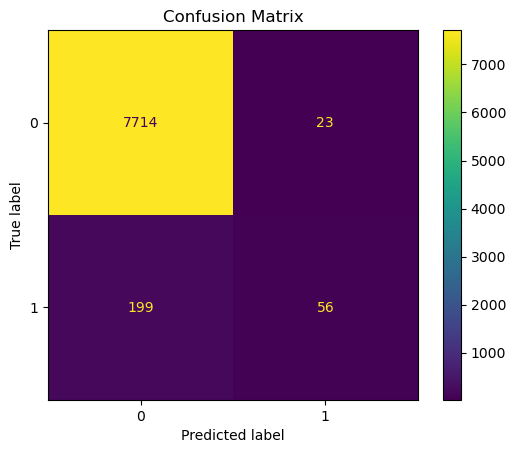

In [25]:
# Importing Logistic Regression Model
from sklearn.linear_model import LogisticRegression
# Storing it inside a variable
model = LogisticRegression()
# Fitting the model to train set
model.fit(df,df_y)
# Using the model to predict the y using x_test 
y_pred_lr = model.predict(test_x)
# Train And Test Accuracy
log_train_accuracy = round(model.score(df,df_y) * 100, 2)
from sklearn.metrics import accuracy_score
log_test_accuracy = round(accuracy_score(y_pred_lr,test_y) * 100, 2)
print("Training Accuracy    :",log_train_accuracy ,"%")
print("Model Accuracy Score :",log_test_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
# Detailed Report - F1 Score etc
from sklearn.metrics import classification_report
print("Classification_Report: \n",classification_report(test_y,y_pred_lr))
print("\033[1m--------------------------------------------------------\033[0m")
# Confusion Matrix
from sklearn import metrics
#metrics.confusion_matrix(df_y,test_y )
metrics.ConfusionMatrixDisplay.from_estimator(model,df,df_y);
plt.title('Confusion Matrix');
from sklearn.metrics import mean_squared_error
df_predictions=model.predict(df)
mean_squared_error(df_y, df_predictions)

## Decision Tree Model

Training Accuracy    : 100.0 %
Model Accuracy Score : 3.75 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      1924
           1       0.04      1.00      0.07        75

    accuracy                           0.04      1999
   macro avg       0.02      0.50      0.04      1999
weighted avg       0.00      0.04      0.00      1999

--------------------------------------------------------


E:\Anaconda folder\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
E:\Anaconda folder\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda folder\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda folder\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_divis

0.0

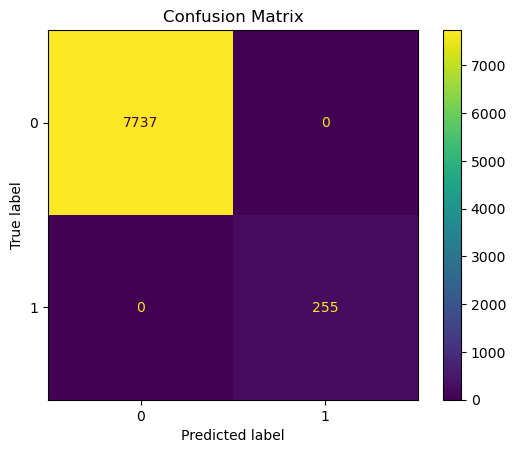

In [22]:
# Importing Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
# Storing it inside a variable
model = DecisionTreeClassifier()
# Fitting the model to train set
model.fit(df_tr,df_y)
# Using the model to predict the y using x_test 
y_pred_lr = model.predict(test_x)
# Train And Test Accuracy
log_train_accuracy = round(model.score(df_tr,df_y) * 100, 2)
from sklearn.metrics import accuracy_score
log_test_accuracy = round(accuracy_score(y_pred_lr,test_y) * 100, 2)
print("Training Accuracy    :",log_train_accuracy ,"%")
print("Model Accuracy Score :",log_test_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
# Detailed Report - F1 Score etc
from sklearn.metrics import classification_report
print("Classification_Report: \n",classification_report(test_y,y_pred_lr))
print("\033[1m--------------------------------------------------------\033[0m")
# Confusion Matrix
from sklearn import metrics
#metrics.confusion_matrix(df_y,test_y )
metrics.ConfusionMatrixDisplay.from_estimator(model,df_tr,df_y);
plt.title('Confusion Matrix');
from sklearn.metrics import mean_squared_error
df_predictions=model.predict(df_tr)
mean_squared_error(df_y, df_predictions)


Training Accuracy    : 100.0 %
Model Accuracy Score : 98.5 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1924
           1       0.91      0.67      0.77        75

    accuracy                           0.98      1999
   macro avg       0.95      0.83      0.88      1999
weighted avg       0.98      0.98      0.98      1999

--------------------------------------------------------


0.0

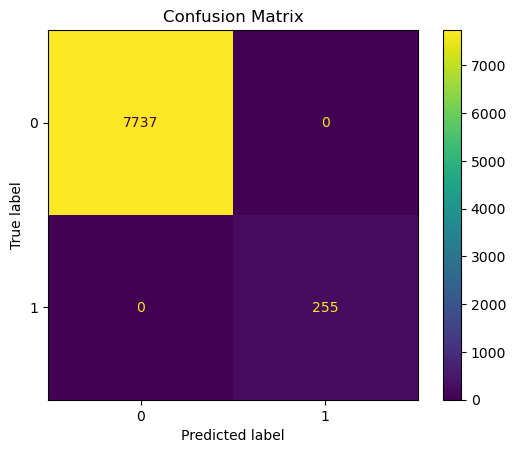

In [24]:
# Importing Decision Tree Model
from sklearn.ensemble import RandomForestClassifier
# Storing it inside a variable
model = RandomForestClassifier()
# Fitting the model to train set
model.fit(df,df_y)
# Using the model to predict the y using x_test 
y_pred_lr = model.predict(test_x)
# Train And Test Accuracy
log_train_accuracy = round(model.score(df,df_y) * 100, 2)
from sklearn.metrics import accuracy_score
log_test_accuracy = round(accuracy_score(y_pred_lr,test_y) * 100, 2)
print("Training Accuracy    :",log_train_accuracy ,"%")
print("Model Accuracy Score :",log_test_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
# Detailed Report - F1 Score etc
from sklearn.metrics import classification_report
print("Classification_Report: \n",classification_report(test_y,y_pred_lr))
print("\033[1m--------------------------------------------------------\033[0m")
# Confusion Matrix
from sklearn import metrics
#metrics.confusion_matrix(df_y,test_y )
metrics.ConfusionMatrixDisplay.from_estimator(model,df,df_y);
plt.title('Confusion Matrix');
from sklearn.metrics import mean_squared_error
df_predictions=model.predict(df)
mean_squared_error(df_y, df_predictions)